In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('coin_gecko_2022-03-16.csv')
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
495,ARPA Chain,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,2022-03-16
496,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16
497,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16
498,SuperRare,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,2022-03-16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          497 non-null    float64
 4   24h         497 non-null    float64
 5   7d          497 non-null    float64
 6   24h_volume  497 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


In [4]:
df.isnull().sum()

coin          0
symbol        0
price         0
1h            3
24h           3
7d            3
24h_volume    3
mkt_cap       0
date          0
dtype: int64

In [5]:
# Here we can clearly see that the null values in these columns are 0.6% so we can easily drop them 
A = (df['1h'].isna().sum()/len(df['1h']))*100
print(f'Percentage of null values in 1h column is {A}')
B = (df['24h'].isna().sum()/len(df['1h']))*100
print(f'Percentage of null values in 24h column is {B}')
C = (df['24h_volume'].isna().sum()/len(df['1h']))*100
print(f'Percentage of null values in 24h_volume column is {C}')

Percentage of null values in 1h column is 0.6
Percentage of null values in 24h column is 0.6
Percentage of null values in 24h_volume column is 0.6


In [6]:
df.dropna(subset=['1h', '24h', '24h_volume'], inplace=True)
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
495,ARPA Chain,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,2022-03-16
496,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16
497,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16
498,SuperRare,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,2022-03-16


In [7]:
df.isnull().sum()
# Now we can see that no null values are left 

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64

In [8]:
df.dtypes
# Here our data column is showing object datatype which is not correct, we have to change it to datetime

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['date']
# Now it's datatype is succssfully convert to datetime

0     2022-03-16
1     2022-03-16
2     2022-03-16
3     2022-03-16
4     2022-03-16
         ...    
495   2022-03-16
496   2022-03-16
497   2022-03-16
498   2022-03-16
499   2022-03-16
Name: date, Length: 497, dtype: datetime64[ns]

In [10]:
# Extract year, month, and day from the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,year,month,day
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,2022,3,16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,2022,3,16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,2022,3,16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,2022,3,16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,2022,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ARPA Chain,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,2022-03-16,2022,3,16
496,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16,2022,3,16
497,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16,2022,3,16
498,SuperRare,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,2022-03-16,2022,3,16


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['24h_volume', 'price']])
data_scaled

array([[6.10870496e-01, 9.91318930e-01],
       [3.40876946e-01, 6.65839829e-02],
       [1.00000000e+00, 2.42616747e-05],
       [2.40934621e-02, 9.30265396e-03],
       [6.68382787e-02, 2.42586178e-05],
       [6.77519078e-02, 1.90458514e-05],
       [4.59395821e-02, 2.17166251e-03],
       [3.06579488e-02, 2.07704198e-03],
       [1.64100947e-02, 1.99955261e-05],
       [1.31561120e-02, 4.50054067e-04],
       [1.49622741e-02, 1.78784281e-03],
       [6.97245581e-02, 2.42616747e-05],
       [7.79908394e-03, 2.80610527e-06],
       [1.28110719e-02, 2.42616747e-05],
       [9.43031264e-03, 5.43864404e-10],
       [7.64729127e-03, 9.90372240e-01],
       [1.71284253e-03, 9.74288201e-06],
       [1.14863096e-02, 3.49368116e-05],
       [5.37002947e-03, 2.42478213e-05],
       [1.35462737e-02, 6.98736234e-04],
       [1.26990397e-02, 2.65519769e-03],
       [3.50859478e-04, 6.66058184e-02],
       [6.94658855e-03, 2.57416369e-04],
       [1.24436883e-02, 3.49610734e-04],
       [1.049979

In [12]:
mode_values = df.mode().iloc[0]
mode_values

coin                           0x
symbol                        FEG
price                         1.0
1h                          0.018
24h                         0.022
7d                            0.0
24h_volume                    0.0
mkt_cap                65770433.0
date          2022-03-16 00:00:00
year                       2022.0
month                         3.0
day                          16.0
Name: 0, dtype: object

In [13]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap,date,year,month,day
count,4.970000e+02,497.000000,497.000000,497.000000,4.970000e+02,4.970000e+02,497,497.0,497.0,497.0
mean,6.565718e+02,0.018746,0.028849,0.039016,3.276644e+08,3.744504e+09,2022-03-15 23:59:59.999999744,2022.0,3.0,16.0
min,1.544000e-09,-0.039000,-0.141000,-0.547000,0.000000e+00,6.577043e+07,2022-03-16 00:00:00,2022.0,3.0,16.0
25%,1.916270e-01,0.011000,0.004000,-0.020000,1.838591e+06,1.148151e+08,2022-03-16 00:00:00,2022.0,3.0,16.0
50%,1.090000e+00,0.018000,0.021000,0.006000,8.581305e+06,2.088983e+08,2022-03-16 00:00:00,2022.0,3.0,16.0
75%,6.850000e+00,0.026000,0.040000,0.049000,4.075655e+07,5.875117e+08,2022-03-16 00:00:00,2022.0,3.0,16.0
max,4.121727e+04,0.086000,0.573000,2.935000,5.793497e+10,7.709915e+11,2022-03-16 00:00:00,2022.0,3.0,16.0
std,4.592093e+03,0.013867,0.058065,0.203688,3.182264e+09,3.795671e+10,NaN,0.0,0.0,0.0


In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True, cmap='coolwarm',linewidth=0.5)     

NameError: name 'corr' is not defined

<Figure size 1200x600 with 0 Axes>

In [17]:
# Example: Liquidity ratio = Volume / Market Cap
df['liquidity_ratio'] = df['24h_volume'] / (df['mkt_cap'] + 1e-6)

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    
# Rolling average
df['rolling_volume'] = df['24h_volume'].rolling(window=7).mean()

# Volatility - rolling standard deviation
df['volatility'] = df['price'].rolling(window=7).std()

df = df.dropna()  # Drop rows with NaN after rolling

df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,year,month,day,liquidity_ratio,rolling_volume,volatility
6,Terra,LUNA,89.510000,0.024,-0.005,0.046,2.661508e+09,3.294596e+10,2022-03-16,2022,3,16,0.080784,1.784704e+10,15273.120920
7,Solana,SOL,85.610000,0.024,0.014,0.041,1.776167e+09,2.753589e+10,2022-03-16,2022,3,16,0.064504,1.304495e+10,1011.023650
8,Cardano,ADA,0.824161,0.016,0.016,0.028,9.507183e+08,2.633189e+10,2022-03-16,2022,3,16,0.036105,1.035953e+10,139.771753
9,Polkadot,DOT,18.550000,0.031,0.035,0.095,7.621989e+08,2.017527e+10,2022-03-16,2022,3,16,0.037779,2.191989e+09,138.261307
10,Avalanche,AVAX,73.690000,0.034,0.032,0.011,8.668389e+08,1.956362e+10,2022-03-16,2022,3,16,0.044309,2.116416e+09,42.241030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ARPA Chain,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,2022-03-16,2022,3,16,0.221823,8.721118e+06,2554.048025
496,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16,2022,3,16,0.109963,9.700153e+06,2554.062658
497,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16,2022,3,16,0.006379,9.425658e+06,2558.112438
498,SuperRare,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,2022-03-16,2022,3,16,0.247817,1.172935e+07,0.572479


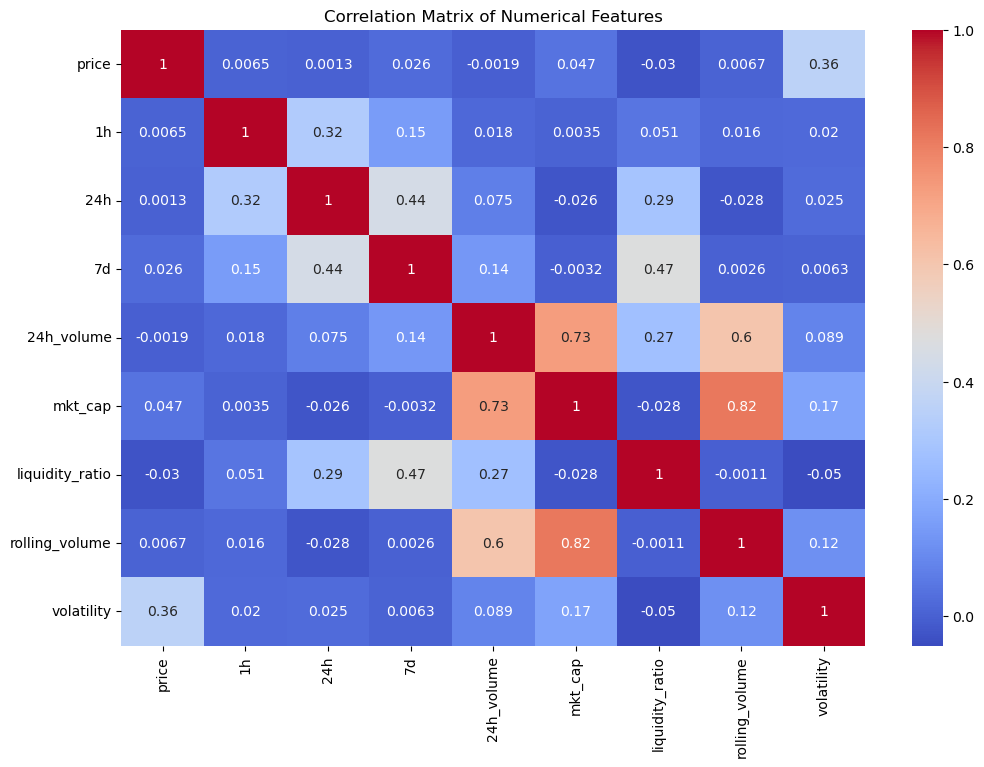

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
features = ['mkt_cap', '24h_volume', 'rolling_volume', 'volatility']
target = 'liquidity_ratio'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [21]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.01455515448517589
RMSE: 0.034717867910169536
R2 Score: 0.9600538718854221


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(XGBRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error')

In [23]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [25]:
import joblib
from xgboost import XGBRegressor



# Save the trained model to a file
joblib.dump(grid, 'xgboost_model.pkl')  # You can change the path as needed
print(f'Model saved succesfully')

Model saved succesfully


In [ ]:
joblib.dump(data_scaled,'scaler')
print(f'Model saved successfully')

'C:\\Users\\kumar\\ML\\ML module\\Project'